<a href="https://colab.research.google.com/github/marastika/algoritma_linear-programming/blob/main/Algortima_linear_programming_air_asam_tambang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 47.3 MB/s eta 0:00:00


In [5]:
import pulp

# Membuat masalah optimisasi
problem = pulp.LpProblem("Maximize_Profit", pulp.LpMaximize)

# Definisikan variabel keputusan dengan batasan yang diberikan
x1 = pulp.LpVariable('x1', lowBound=10000, upBound=540000, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, upBound=100000, cat='Continuous')

# Fungsi objektif (maksimisasi profit)
problem += 3200 * x1 + 15000 * x2, "Total_Profit"

# Menyelesaikan masalah
problem.solve()

# Menampilkan hasil
print("Status:", pulp.LpStatus[problem.status])
print("Nilai optimal dari fungsi objektif:", pulp.value(problem.objective))
print("Nilai variabel keputusan:")
print(f"x1 (Kapur): {x1.varValue} kg")
print(f"x2 (Soda Kaustik): {x2.varValue} kg")


Status: Optimal
Nilai optimal dari fungsi objektif: 3228000000.0
Nilai variabel keputusan:
x1 (Kapur): 540000.0 kg
x2 (Soda Kaustik): 100000.0 kg


Status: Optimal
Nilai optimal dari fungsi objektif: 3228000000.0
Nilai variabel keputusan:
x1 (Kapur): 540000.0 kg
x2 (Soda Kaustik): 100000.0 kg


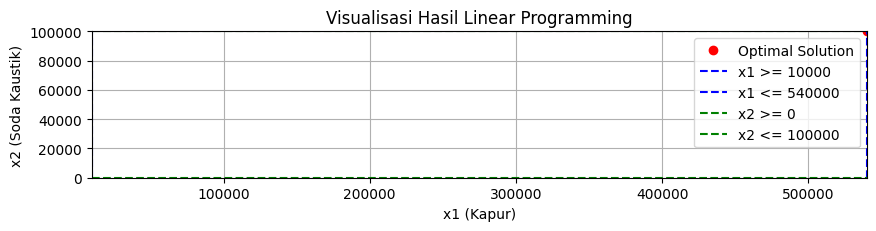

In [6]:
import pulp
import matplotlib.pyplot as plt
import numpy as np

# Membuat masalah optimisasi
problem = pulp.LpProblem("Maximize_Profit", pulp.LpMaximize)

# Definisikan variabel keputusan dengan batasan yang diberikan
x1 = pulp.LpVariable('x1', lowBound=10000, upBound=540000, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, upBound=100000, cat='Continuous')

# Fungsi objektif (maksimisasi profit)
problem += 3200 * x1 + 15000 * x2, "Total_Profit"

# Menyelesaikan masalah
problem.solve()

# Menampilkan hasil
print("Status:", pulp.LpStatus[problem.status])
print("Nilai optimal dari fungsi objektif:", pulp.value(problem.objective))
print("Nilai variabel keputusan:")
print(f"x1 (Kapur): {x1.varValue} kg")
print(f"x2 (Soda Kaustik): {x2.varValue} kg")

# Visualisasi hasil
x1_optimal = x1.varValue
x2_optimal = x2.varValue

# Definisikan batasan
x1_bounds = [10000, 540000]
x2_bounds = [0, 100000]

# Buat plot
plt.figure(figsize=(10, 6))

# Area feasible
x1_range = np.linspace(x1_bounds[0], x1_bounds[1], 400)
x2_range = np.linspace(x2_bounds[0], x2_bounds[1], 400)

X1, X2 = np.meshgrid(x1_range, x2_range)
feasible = (X1 >= x1_bounds[0]) & (X1 <= x1_bounds[1]) & (X2 >= x2_bounds[0]) & (X2 <= x2_bounds[1])

plt.imshow(feasible, extent=(x1_bounds[0], x1_bounds[1], x2_bounds[0], x2_bounds[1]), origin="lower", cmap="Greys", alpha=0.3)

# Plot solusi optimal
plt.plot(x1_optimal, x2_optimal, 'ro', label='Optimal Solution')

# Plot batasan
plt.axvline(x=x1_bounds[0], color='b', linestyle='--', label='x1 >= 10000')
plt.axvline(x=x1_bounds[1], color='b', linestyle='--', label='x1 <= 540000')
plt.axhline(y=x2_bounds[0], color='g', linestyle='--', label='x2 >= 0')
plt.axhline(y=x2_bounds[1], color='g', linestyle='--', label='x2 <= 100000')

plt.xlabel('x1 (Kapur)')
plt.ylabel('x2 (Soda Kaustik)')
plt.title('Visualisasi Hasil Linear Programming')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import linprog

# Koefisien dari fungsi objektif
c = [3200, 15000]

# Koefisien dari batasan (Ax <= b)
# Dalam hal ini, kita akan mempertimbangkan dua batasan utama:
# 1. Kapur: 10.000 <= x1 <= 540.000
# 2. Soda Kaustik: 0 <= x2 <= 100.000

A = [
    [-1, 0],  # untuk x1 >= 10.000
    [1, 0],   # untuk x1 <= 540.000
    [0, -1],  # untuk x2 >= 0
    [0, 1]    # untuk x2 <= 100.000
]

b = [
    -10000,   # untuk x1 >= 10.000
    540000,   # untuk x1 <= 540.000
    0,        # untuk x2 >= 0
    100000    # untuk x2 <= 100.000
]

# Batasan untuk variabel (x1, x2) >= 0 sudah tercakup dalam bentuk standar linprog

# Menyelesaikan masalah linear programming menggunakan metode Simplex
res = linprog(c, A_ub=A, b_ub=b, method='simplex')

# Menampilkan hasil
print('Status:', res.message)
print('Nilai optimal dari fungsi objektif:', res.fun)
print('Nilai variabel keputusan:')
print('x1 (Kapur):', res.x[0], 'kg')
print('x2 (Soda Kaustik):', res.x[1], 'kg')


Status: The solution was determined in presolve as there are no non-trivial constraints.
Nilai optimal dari fungsi objektif: 32000000.0
Nilai variabel keputusan:
x1 (Kapur): 10000.0 kg
x2 (Soda Kaustik): 0.0 kg


<ipython-input-7-6d46c6a9aac9>:29: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A, b_ub=b, method='simplex')


In [ ]:
pip install matplotlib

<ipython-input-9-cc1b0cb5b4d1>:27: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, method='simplex')


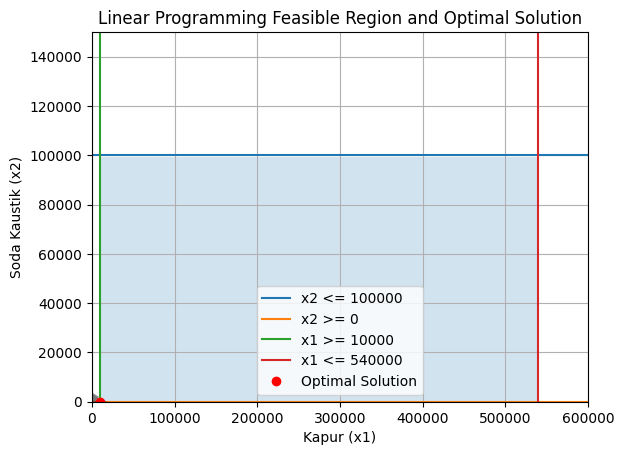

Optimal value (minimum cost): 32000000.0
Optimal values of the variables: x1 (Kapur) = 10000.0 kg, x2 (Soda Kaustik) = 0.0 kg


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Definisikan koefisien dari fungsi objektif (minimasi biaya)
c = [3200, 15000]  # Biaya per kg Kapur dan Soda Kaustik

# Definisikan koefisien dari batasan (Ax <= b)
# Dalam hal ini, kita akan mempertimbangkan batasan utama:
# 1. Kapur: 10.000 <= x1 <= 540.000
# 2. Soda Kaustik: 0 <= x2 <= 100.000
A = [
    [-1, 0],  # -x1 <= -10.000 (x1 >= 10.000)
    [1, 0],   # x1 <= 540.000
    [0, 1],   # x2 <= 100.000
    [0, -1]   # -x2 <= 0 (x2 >= 0)
]

b = [
    -10000,  # x1 >= 10.000
    540000,  # x1 <= 540.000
    100000,  # x2 <= 100.000
    0        # x2 >= 0
]

# Selesaikan masalah linear programming menggunakan metode Simplex
result = linprog(c, A_ub=A, b_ub=b, method='simplex')

# Ekstrak solusi optimal
x1_opt, x2_opt = result.x

# Plotting
x = np.linspace(0, 600000, 400)

# Plotkan batasan
plt.plot(x, np.full_like(x, 100000), label='x2 <= 100000')
plt.plot(x, np.full_like(x, 0), label='x2 >= 0')
plt.plot(np.full_like(x, 10000), x, label='x1 >= 10000')
plt.plot(np.full_like(x, 540000), x, label='x1 <= 540000')

# Isi daerah layak
plt.fill_betweenx(x, 10000, 540000, alpha=0.2, where=(x <= 100000))

# Garis fungsi objektif (untuk ilustrasi, menunjukkan beberapa garis untuk memvisualisasikan arah)
for Z in [1e7, 2e7, 3e7, 4e7, 5e7]:
    plt.plot(x, (Z - 3200 * x) / 15000, 'k--', alpha=0.4)

# Plotkan solusi optimal
plt.plot(x1_opt, x2_opt, 'ro', label='Optimal Solution')

# Anotasi
plt.xlabel('Kapur (x1)')
plt.ylabel('Soda Kaustik (x2)')
plt.title('Linear Programming Feasible Region and Optimal Solution')
plt.legend()
plt.grid(True)
plt.xlim(0, 600000)
plt.ylim(0, 150000)

# Tampilkan plot
plt.show()

print(f'Optimal value (minimum cost): {result.fun}')
print(f'Optimal values of the variables: x1 (Kapur) = {x1_opt} kg, x2 (Soda Kaustik) = {x2_opt} kg')


In [2]:
import numpy as np
from scipy.optimize import linprog

# Koefisien dari fungsi objektif
c = [3200, 15000]

# Koefisien dari batasan (Ax <= b)
A = [
    [-1, 0],  # untuk x1 >= 10,000
    [1, 0],   # untuk x1 <= 540,000
    [0, -1],  # untuk x2 >= 0
    [0, 1]    # untuk x2 <= 100,000
]

b = [
    -10000,   # untuk x1 >= 10,000
    540000,   # untuk x1 <= 540,000
    0,        # untuk x2 >= 0
    100000    # untuk x2 <= 100,000
]

# Menyelesaikan masalah linear programming menggunakan metode Simplex
res = linprog(c, A_ub=A, b_ub=b, method='simplex')

# Menampilkan hasil
print('Status:', res.message)
print('Nilai optimal dari fungsi objektif:', res.fun)
print('Nilai variabel keputusan:')
print('x1 (Kapur):', res.x[0], 'kg')
print('x2 (Soda Kaustik):', res.x[1], 'kg')


Status: The solution was determined in presolve as there are no non-trivial constraints.
Nilai optimal dari fungsi objektif: 32000000.0
Nilai variabel keputusan:
x1 (Kapur): 10000.0 kg
x2 (Soda Kaustik): 0.0 kg


<ipython-input-2-54eb8aee27f1>:23: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A, b_ub=b, method='simplex')
